Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

Load Dataset & Basic Exploration

In [ ]:
df = pd.read_csv('/content/marketing_campaign.csv', sep='\t')
print(df.head())


     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Dataset Summary

In [ ]:
print(df.describe())

                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000  

In [ ]:
print(df.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


Data Preprocessing

In [ ]:
df = df.dropna()
df = df.drop(columns=['ID'])

In [ ]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['Customer_For'] = (pd.Timestamp("2025-01-01") - df['Dt_Customer']).dt.days

In [ ]:
df = pd.get_dummies(df, drop_first=True)


In [ ]:
# Standardize data
scaler = StandardScaler()
numeric_features = df.select_dtypes(include=np.number).columns
X_scaled = scaler.fit_transform(df[numeric_features])

Custom Palette For Visualization

In [ ]:
palette = sns.color_palette("Set1", 5)

Correlation Map

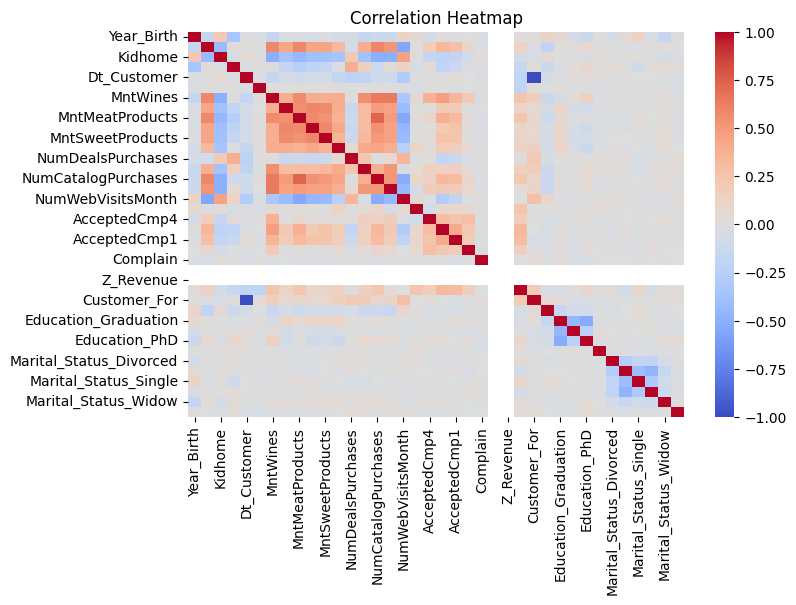

In [ ]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

Dimensionality Reduction

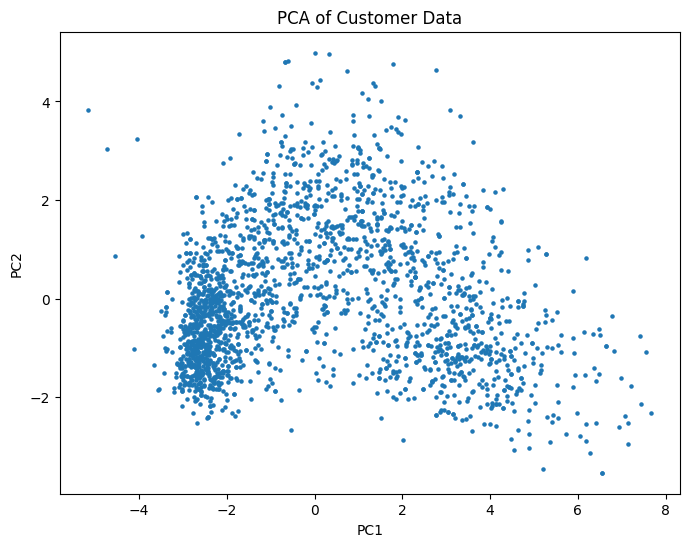

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=5)
plt.title('PCA of Customer Data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Customer Segmentation using GMM

In [ ]:
aic_values = []
bic_values = []
silhouette_scores = []

n_components_range = range(2, 11)

for n in n_components_range:
    gmm = GaussianMixture(n_components=n, random_state=42)
    labels = gmm.fit_predict(X_scaled)
    aic_values.append(gmm.aic(X_scaled))
    bic_values.append(gmm.bic(X_scaled))
    silhouette_scores.append(silhouette_score(X_scaled, labels))

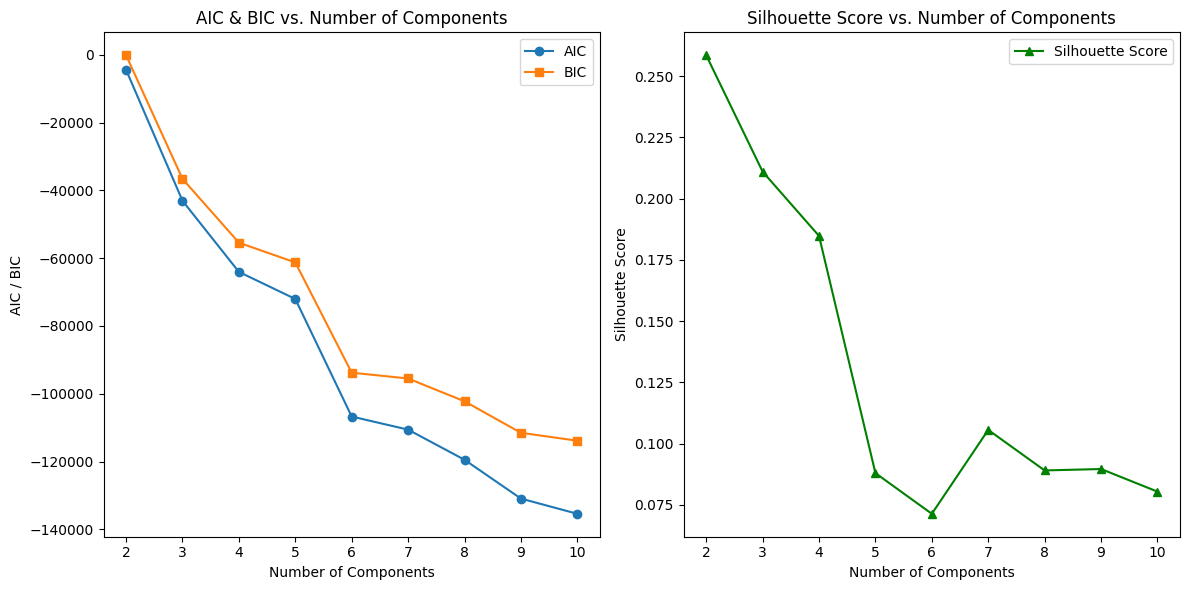

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(n_components_range, aic_values, label='AIC', marker='o')
plt.plot(n_components_range, bic_values, label='BIC', marker='s')
plt.xlabel('Number of Components')
plt.ylabel('AIC / BIC')
plt.title('AIC & BIC vs. Number of Components')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(n_components_range, silhouette_scores, label='Silhouette Score', marker='^', color='green')
plt.xlabel('Number of Components')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Components')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
best_n_bic = n_components_range[np.argmin(bic_values)]
best_n_silhouette = n_components_range[np.argmax(silhouette_scores)]

print("Best n_components by BIC:", best_n_bic)
print("Best n_components by Silhouette Score:", best_n_silhouette)


Best n_components by BIC: 10
Best n_components by Silhouette Score: 2


In [ ]:
# Fit final model
best_n = n_components_range[np.argmax(silhouette_scores)] # Changed n_components to n_components_range
gmm = GaussianMixture(n_components=best_n, random_state=42)
df['Cluster'] = gmm.fit_predict(X_scaled)

Customer's Cluster Profiling

In [ ]:
df_clusters = df.copy()
df_clusters['Cluster'] = df['Cluster']
cluster_summary = df_clusters.groupby('Cluster').mean()
print(cluster_summary)

          Year_Birth        Income   Kidhome  Teenhome  \
Cluster                                                  
0        1969.407336  42235.538610  0.597812  0.592021   
1        1967.442598  75749.066465  0.075529  0.302115   

                          Dt_Customer    Recency    MntWines  MntFruits  \
Cluster                                                                   
0       2013-07-19 16:14:49.575289600  48.763835  155.925997  12.438224   
1       2013-06-18 21:16:51.480362496  49.596677  655.247734  59.027190   

         MntMeatProducts  MntFishProducts  ...  Education_Graduation  \
Cluster                                    ...                         
0              60.303732        16.765766  ...              0.496139   
1             417.448640        86.632931  ...              0.521148   

         Education_Master  Education_PhD  Marital_Status_Alone  \
Cluster                                                          
0                0.172458       0.204633     

/tmp/ipython-input-21-1883908836.py:2: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette=palette)


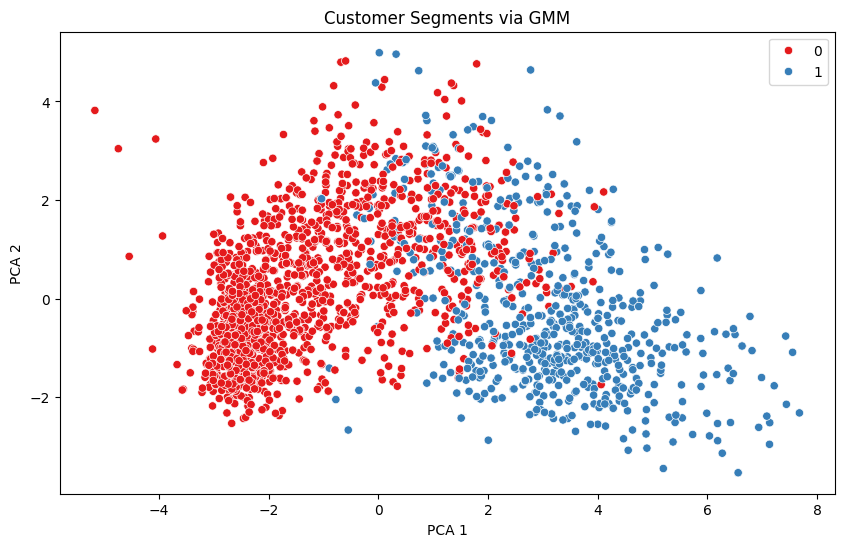

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette=palette)
plt.title('Customer Segments via GMM')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()